In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s
import plotly.express as px

In [3]:
df=pd.read_csv("EDA_file.csv")
df.head(10)

,Unnamed: 0,ID,Origin,Destination,month,day,nadults,Budget,price_min,timestamp,num_children,label
0,0,U2709166N,Alexandria,Hiroshima,8,15,1,6700,1,1472657834,1,1
1,1,U2709166N,Alexandria,Hiroshima,8,15,1,1800,2000,1472658012,1,1
2,2,U2709166N,Alexandria,Hiroshima,8,15,1,3200,13000,1472658046,1,1
3,3,U2709166N,Alexandria,Phoenix,8,15,1,5800,13000,1472658095,1,2
4,4,U2709166N,Alexandria,Phoenix,8,15,1,1800,8000,1472658099,1,2
5,5,U2709166N,Alexandria,Phoenix,8,15,1,1800,5000,1472658123,1,2
6,6,U22K1SX9N,Baltimore,Fukuoka,8,25,4,3900,3000,1471530362,40,3
7,7,U22K1SX9N,Baltimore,Las Vegas,8,25,4,3900,3000,1471530346,40,4
8,8,U22K1SX9N,Barcelona,Curitiba,9,1,1,3700,4000,1473371651,1,5
9,9,U22K1SX9N,Barcelona,Curitiba,9,1,1,3700,8000,1473371656,7,5


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df

,ID,Origin,Destination,month,day,nadults,Budget,price_min,timestamp,num_children,label
0,U2709166N,Alexandria,Hiroshima,8,15,1,6700,1,1472657834,1,1
1,U2709166N,Alexandria,Hiroshima,8,15,1,1800,2000,1472658012,1,1
2,U2709166N,Alexandria,Hiroshima,8,15,1,3200,13000,1472658046,1,1
3,U2709166N,Alexandria,Phoenix,8,15,1,5800,13000,1472658095,1,2
4,U2709166N,Alexandria,Phoenix,8,15,1,1800,8000,1472658099,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1426,U24V2QUKC,washington,sendai,9,1,1,3300,500,1472154364,1,379
1427,U24V2QUKC,washington,sendai,9,1,1,2000,4000,1472154450,1,379
1428,U24V2QUKC,washington,sendai,9,1,1,2000,500,1472154452,1,379
1429,U24V2QUKC,washington,sendai,9,1,1,3300,4500,1472154605,1,379


In [5]:
# Most visited city ( Destination ) Hiroshima
# Most important ( Origin ) Alexandria
# Most busy ( to and fro ) Punta Cana 
# Less important cities ( Origin )
# Family friendly places
# School or college excursions
# Most favourable time of the year for travel ( weather, events , tourist friendly atmosphere( clear skies.....))
# Most favourable budget.( Average value ) to segregate luxury tours and affordable tours
# Seperate out budget as luxury and affordable, then identify those cities which have most luxury tours ( posh areas (Origin),Main Tourism( Destination )).
# Min. price for a particular tour.
# Maximum people going out of a city at minimum price points towards LACK OF INDUSTRIES OR LOW SKILLED LABOUR at that place, without return travel.(considering PRICE_MIN)
# Distribtions finding. ***

<BarContainer object of 15 artists>

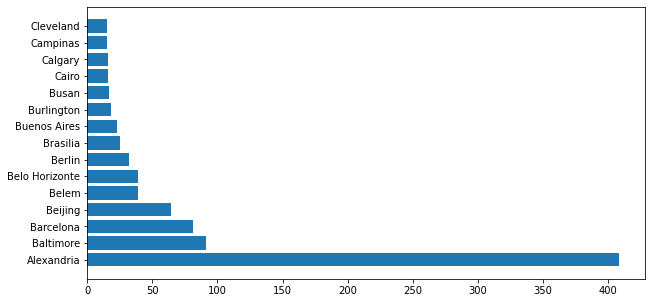

In [6]:
# Most important city ( Origin )
plt.figure(figsize=(10,5))
plt.barh(df['Origin'].unique()[:15], df['Origin'].value_counts()[:15])

<BarContainer object of 15 artists>

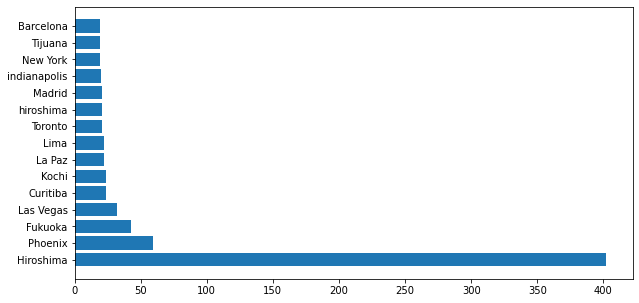

In [7]:
# Most visited city ( Destination )
plt.figure(figsize=(10,5))
plt.barh(df['Destination'].unique()[:15], df['Destination'].value_counts()[:15])

In [8]:
import seaborn as sns

In [9]:
df['Origin'].value_counts()[:5].mean()

136.6

In [10]:
df['Destination'].value_counts()[:5].mean()

112.0

In [11]:
d1=df['Origin'].value_counts().to_dict()
d1.update({'punta cana':96})
del d1["Punta Cana"]
d1



{'tofino': 408,
 'Mannheim': 91,
 'punta cana': 96,
 'Santa Cruz': 64,
 'Houston': 39,
 'tijuana': 39,
 'kobe': 32,
 'sendai': 25,
 'tampa': 23,
 'jerusalem': 18,
 'kingston': 17,
 'vancouver': 16,
 'Tokyo': 16,
 'Nagoya': 15,
 'Kingston': 15,
 'Toronto': 14,
 'la paz': 14,
 'Seattle': 14,
 'Brasilia': 13,
 'Sydney': 13,
 'belo horizonte': 13,
 'Guadalajara': 13,
 'Buenos Aires': 13,
 'Barcelona': 12,
 'toronto': 12,
 'lima': 11,
 'Belo Horizonte': 10,
 'barcelona': 10,
 'denver': 10,
 'monterrey': 9,
 'washington': 9,
 'cancun': 8,
 'santiago': 8,
 'Recife': 8,
 'mexico city': 8,
 'Cleveland': 8,
 'Tijuana': 8,
 'calgary': 8,
 'Ulsan': 7,
 'Belem': 7,
 'burlington': 7,
 'rome': 7,
 'berlin': 7,
 'brasilia': 7,
 'london': 6,
 'san francisco': 6,
 'north vancouver': 6,
 'alexandria': 6,
 'Alexandria': 6,
 'Long Beach': 6,
 'Queenstown': 6,
 'North Vancouver': 6,
 'Santo Domingo': 5,
 'salvador': 5,
 'Manaus': 5,
 'Burlington': 5,
 'essen': 5,
 'Beijing': 4,
 'paris': 4,
 'baltimore': 4,

In [12]:
d2=df['Destination'].value_counts().to_dict()
d2.update({'punta cana':81})
del d2["Punta Cana"]
d2

{'sao paulo': 402,
 'punta cana': 81,
 'Denver': 43,
 'Toronto': 32,
 'porto alegre': 24,
 'los angeles': 24,
 'New York': 22,
 'Rio de Janeiro': 21,
 'brasilia': 21,
 'rome': 21,
 'curitiba': 20,
 'sacramento': 19,
 'San Antonio': 19,
 'kobe': 19,
 'St. Petersburg': 17,
 'leon': 16,
 'santo domingo': 16,
 'Busan': 15,
 'Hamburg': 15,
 'Burlington': 15,
 'rosario': 14,
 'Brasilia': 14,
 'kyoto': 14,
 'Halifax': 14,
 'sydney': 14,
 'Minneapolis': 13,
 'Alexandria': 13,
 'Brazil': 12,
 'Porto Alegre': 12,
 'Pittsburgh': 10,
 'santa cruz': 10,
 'Santo Domingo': 9,
 'indianapolis': 9,
 'guadalajara': 8,
 'Hiroshima': 7,
 'miami': 7,
 'San Diego': 7,
 'Tijuana': 7,
 'melbourne': 6,
 'Queenstown': 6,
 'recife': 6,
 'Vancouver': 6,
 'Ulsan': 6,
 'nagoya': 6,
 'belem': 6,
 'paris': 6,
 'phoenix': 6,
 'sendai': 6,
 'Lima': 6,
 'Curitiba': 6,
 'Barcelona': 6,
 'Sao Paulo': 6,
 'Milan': 6,
 'Naples': 6,
 'Manaus': 5,
 'San Juan': 5,
 'Madrid': 5,
 'burlington': 5,
 'osaka': 5,
 'manaus': 5,
 'Man

In [13]:
l=[]
for i in d1.items():
    if i[1]>=80 and i[1]<=120:
        l.append(i[0])
for j in d2.items():
    if j[1]>=80 and j[1]<=120:
        if j[0] in l:
            print(j[0])
        

punta cana


# There, Punta Cana is the most important tourist place in Caribbean. The Punta Cana International Airport is the primary airport. 
# In 2014, Punta Cana received over 2.4 million passengers, making it the second-busiest airport in the Caribbean.

In [14]:
me1=df['Origin'].value_counts()[-11:-1].mean()
me2=df['Destination'].value_counts()[-11:-1].mean()
print(me1," ",me2)

1.0   1.0


In [15]:
l1=[]
for i in d1.items():
    if i[1]==1:
        l1.append(i[0])
for j in d2.items():
    if j[1]==1:
        if j[0] in l1:
            print(j[0])

Los Angeles
Fort Lauderdale


In [16]:
# Family Friendly places
dffamily=(df[(df["nadults"]==2) & ((df["num_children"]==1) | (df["num_children"]==2))])
dffamily["Destination"].value_counts()[:10]

Burlington      14
kobe             8
Porto Alegre     8
Frankfurt        2
porto            2
paris            2
Mexico City      1
phoenix          1
Montreal         1
san jose         1
Name: Destination, dtype: int64

In [17]:
# According to the 2010 population census, the population of Porto Alegre is made up of Roman Catholics (63.85%); Protestants or evangelicals (11.65%); spiritists (7.03%); Umbanda and Candomblé (3.35%); the unreligious (10.38%) and people of other religions (3.64%).[67]
# The Church of Jesus Christ of Latter-day Saints has a temple in Porto Alegre.[68] ( Wiki )

#With its intimate atmosphere and age-friendly attractions, Burlington is truly one of the best places to visit in Vermont with kids. Burlington is a small cosmopolitan urban destination with scores of fun activities for the whole family. From the scenic Waterfront Park to pristine beaches, 
# the town oozes with family fun. https://www.bing.com/ck/a?!&&p=b7eda65990ac85e75cb05235857852d6c1e2d321397195ad9892e47af0bf14eaJmltdHM9MTY1MzMzNzY3NCZpZ3VpZD02OTMzYjMwMC0xNjM5LTRkNzgtYTQ0ZC1kYmZhYTJhNTU1Y2YmaW5zaWQ9NTQwNg&ptn=3&fclid=d346ecf9-dad6-11ec-ba76-ca5e0c10bd30&u=a1aHR0cHM6Ly9mYW1pbHlkZXN0aW5hdGlvbnNndWlkZS5jb20vYmVzdC1mYW1pbHktdmFjYXRpb25zLWluLXZlcm1vbnQvIzp-OnRleHQ9V2l0aCUyMGl0cyUyMGludGltYXRlJTIwYXRtb3NwaGVyZSUyMGFuZCUyMGFnZS1mcmllbmRseSUyMGF0dHJhY3Rpb25zJTJDJTIwQnVybGluZ3RvbixwcmlzdGluZSUyMGJlYWNoZXMlMkMlMjB0aGUlMjB0b3duJTIwb296ZXMlMjB3aXRoJTIwZmFtaWx5JTIwZnVuLg&ntb=1

In [18]:
# School or college excursions


df["num_children"].max()
k=df[(df["num_children"]==40)]
k["Destination"].unique()

array(['Fukuoka', 'Las Vegas', 'New York', 'Pittsburgh', 'Hamburg',
       'manaus', 'madrid', 'santa cruz', 'osaka'], dtype=object)

In [19]:
k["Destination"].value_counts()[:5]

New York    4
Hamburg     3
madrid      3
Fukuoka     2
osaka       2
Name: Destination, dtype: int64

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['ID', 'Origin', 'Destination', 'month', 'day', 'nadults', 'Budget', 'price_min', 'timestamp', 'num_children', 'label'] but received: year

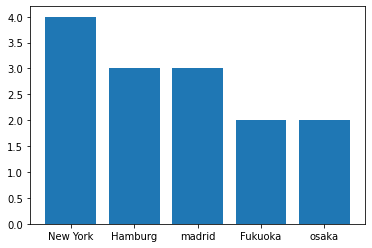

In [20]:
l=k["Destination"].value_counts()[:5].keys()
plt.bar(l,k["Destination"].value_counts()[:5].to_list())
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

Therefore, we can deduce that New York, Hamburg,madrid, Fukuoka and Osaka are centres of education where students visit in large numbers every year.

FUKUOKA


Nearly ten thousand international students attend universities in or 
near the Fukuoka prefecture each year.
Nearly 200 international conferences are held each year in Fukuoka.( Source : https://en.wikipedia.org/wiki/Fukuoka#Tourism)
                                                                    
Of Japan’s eight major cities (excluding metropolitan Tokyo and Osaka), Fukuoka has the second-most university students, with six people in every 100 being students. Kyoto has the highest student ratio. 
Further, people between 15 and 29 years old make up 25.9% of Fukuoka’s population.   

(https://survivejapan.weebly.com/fukuoka/10-interesting-facts-about-fukuoka#:~:text=Of%20Japan%E2%80%99s%20eight%20major%20cities,in%20every%20100%20being%20students.)                                                               

MADRID

The Autonomous University of Madrid (UAM) is a Spanish public university located in Madrid and founded in 1968.
Consistently ranked at the top of the rankings for its teaching and research excellence, the UAM is the Best University in Madrid and the second in Spain according to the QS Ranking 2022 and is among the 400 best universities in the world according to the Academic Ranking of World Universities (ARWU) or Shanghai Ranking 2021.

Hamburg

The UNESCO Institute for Lifelong Learning, one of the six educational institutes of UNESCO, is located in Hamburg. ( Source Wiki )

<BarContainer object of 5 artists>

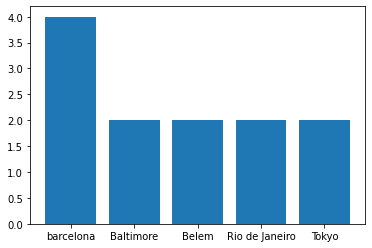

In [21]:
l=k["Origin"].value_counts()[:5].keys()
plt.bar(l,k["Origin"].value_counts()[:5].to_list())

### So we find that there is more educational and career awareness in these 5 cities ( Barcelona , Baltimore Belem,  Rio de Jjaneiro Tokyo ) as there is a huge influx of students from these cities
### to the 5 cities of educational excellence found above as New York, Hamburg,madrid, Fukuoka and Osaka.

# Even we found that Madrid is closer to Barcelona, so this claim holds true.

In [ ]:
# Most favourable time of the year for travel ( weather, events , tourist friendly atmosphere( clear skies.....))

df["month"].value_counts()

# August and September.
# More preference is August.

In [ ]:
f=df[(df["month"]==8)][["Origin","Destination"]]
f["Origin"].value_counts()[:5]


In [ ]:
d=(f["Destination"].value_counts().to_dict())
d.update({"brasilia":35})
del d["Brasilia"]

pd.Series(d)[:5]


In [ ]:
    f[(f["Origin"]=="Toronto") | (f["Origin"]=="vancouver")]

In [ ]:
f[(f["Destination"]=="Toronto") | (f["Destination"]=="vancouver")]

Therefore, most of the inter-continental tours are in the month of August. ( Mostly from Europe and Japan to Americas( Canada and Latin ) 
It may be because August is the warmest month in Europe                                                                       

In [ ]:
# Most favourable budget.( Average value ) to segregate luxury tours and affordable tours
# Seperate out budget as luxury and affordable, then identify those cities which have most luxury tours ( posh areas (Origin),Main Tourism( Destination )).

plt.hist(df["Budget"],bins=[10000,20000,30000,40000,50000,60000])

In [ ]:
df["Budget"].value_counts().head(20)

# Most favourable Budget is in the range "1000-10000" with 5724 ( Approx. 6000 ) being the average.

In [ ]:
a=df["Budget"].value_counts().keys().to_list()
a.sort()
print(a)

In [ ]:
tourism=df[(df["Budget"]>=1000) & (df["Budget"]<=10000)]
tourism["Origin"].unique()


#  Most of the tourists are from these Cities, so tourism culture is very popular in these places.

In [ ]:
list(tourism["Origin"].value_counts().keys())[:10]

In [ ]:
luxury=df[(df["Budget"]>=10000)]
luxury["Origin"].unique()

# Tourists from these places prefer luxury tours with budget > 10000.

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(luxury["Origin"].value_counts().keys()[:10],luxury["Origin"].value_counts().to_list()[:10])

# These cities are the most posh cities with rich economy, as evident from the frequent tours organized from these cities ( particularly KOBE, KINGSTON BELO HORIZONTE, RECIFE )

In [ ]:
### The Port of Kobe is both an important port and manufacturing center.As of 2004, the city's total real GDP was ¥6.3 trillion, which amounts to thirty-four percent of the GDP for Hyōgo Prefecture and 
### approximately eight percent for the whole Kansai region.

### According to Statistics Canada, the tourism industry in Kingston represents a vital part of the city's economy. 
### In 2004, over 3,500 jobs were contributed to Kingston's economy due to the tourism industry


### Belo Horizonte receives large numbers of visitors, as it is in the Brazilian main economic axis, exerting influence even on other states. Multinational and Brazilian companies, such as Google and Oi, maintain offices in the city. The service sector plays a very important role in the economy of Belo Horizonte, being responsible for 85% of the city's Gross Domestic Product (GDP), 
### with other industry making up most of the remaining 15%. Organized FIFA world cup in 2010.

# Source Wikipedia

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(tourism["Destination"].value_counts().keys()[:10],tourism["Destination"].value_counts().to_list()[:10])

# So we conclude that cities like "Sao Paulo , Punta Cana , Denver , Toronto , los angeles" are famous tourist places. Here, tourism is an important industry.

In [ ]:
low=df[(df["Budget"]<1000)]
low[(low["nadults"]>1) & (low["num_children"]>=1)]

Cities like Recife, santo domingo, La Paz,... facilitate cheap travel.

In [ ]:
dt=pd.DataFrame(columns=["Origin","Destination","Average Budget"])
for i in df["label"]:
    o=(df[df["label"]==i])["Origin"]
    o1=o.to_list()
    dt.loc[i,"Origin"]=o1[0]
    d=(df[df["label"]==i])["Destination"]
    d1=d.to_list()
    dt.loc[i,["Destination"]]=d1[0]
    avg=(df[df["label"]==i])["Budget"]
    a1=avg.to_list()
    dt.loc[i,["Average Budget"]]=(sum(a1)/len(a1))

In [ ]:
dt

In [ ]:
dffsort=df.copy()
dffsort   ### Sorting by ID

In [ ]:
dffsort.sort_values(by=["ID"],ascending=True,inplace=True)

In [ ]:
dffsort.reset_index(drop=True,inplace=True)

In [ ]:
dffsort.head()

In [ ]:
l1=[]
k=1
for i in range(len(dffsort["ID"])):
    if i%2==1:
        l=0
        t=dffsort[(dffsort["ID"]==dffsort.loc[i,"ID"])]["timestamp"]
        t1=t.to_list()
        l=len(t1)
        l1.append(t1[-1])
        i=i+l
    elif i%2==0:
        t=dffsort[(dffsort["ID"]==dffsort.loc[i,"ID"])]["timestamp"] 
        t2=t.to_list()
        le=len(t2)
        l1.append(t2[0])
        i=i+le

In [ ]:
l2=[]
for i in range(1,len(l1)):
    l2.append(l1[i]-l1[i-1])

for i in range(0,len(l2)):
    if l2[i]<0:
        l2[i]=l2[i]*-1

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(l2)


In [ ]:
l2